# Loading Images
First, let's load some images

In [131]:
from os import listdir
from PIL import Image as PImage
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [132]:
def loadImages(path):
    imagesList = listdir(path)
    imagesList.sort()
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)

    return loadedImages, imagesList

path="images/jpegs/"
imageNames = []

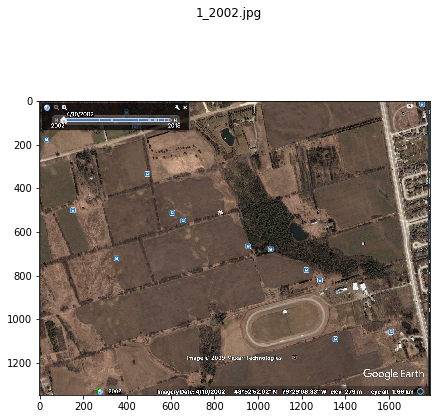

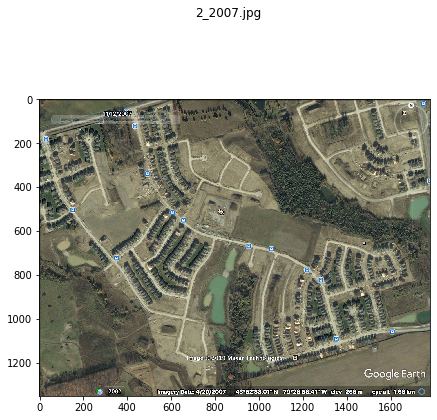

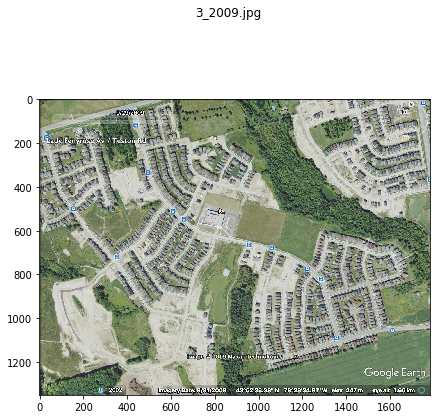

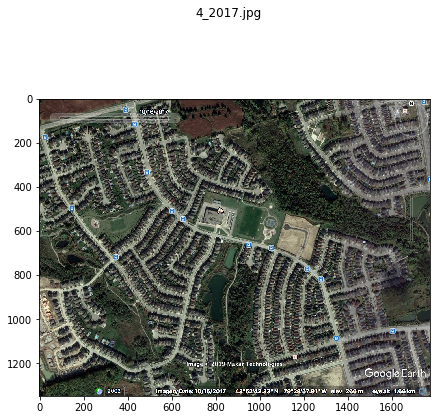

In [133]:
imgs, imageNames = loadImages(path)

for i in range(len(imgs)):
    plt.figure(figsize=(7,7)).suptitle(imageNames[i]) 
    plt.imshow(imgs[i])
    plt.show()


In [134]:
def blackAndWhite(imgs):
    newImages = []
    for img in imgs:
        newImages.append(img.convert('LA'))
    return newImages

In [135]:
blWhite = blackAndWhite(imgs)

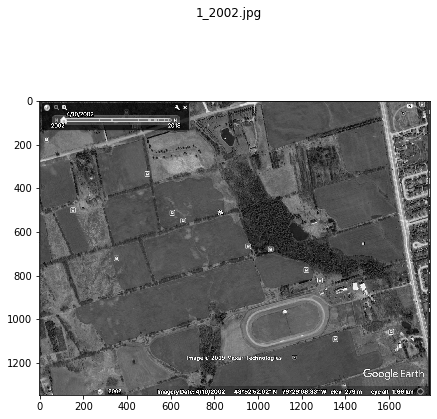

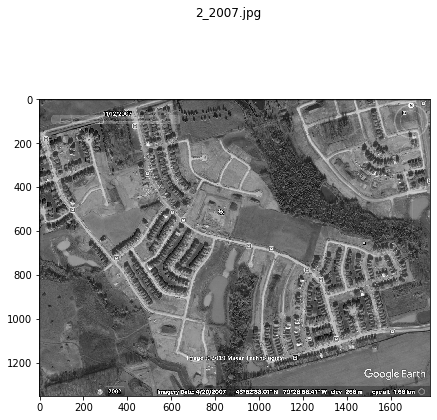

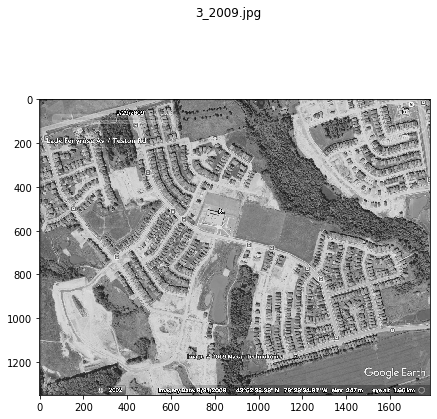

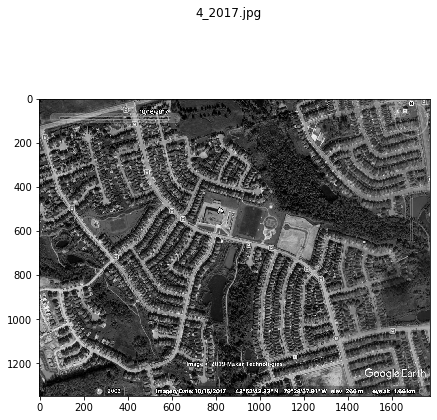

In [136]:
for i in range(len(blWhite)):
    plt.figure(figsize=(7,7)).suptitle(imageNames[i]) 
    plt.imshow(blWhite[i])
    plt.show()

1. Gaussian filter applied to the grayscale. The kernel size used is 5.
2. Canny edge detection algorithm applied to the gaussian result using thresholds 50 and 150.
3. Hough lines extracted from the canny edge image using the following parameters:

rho = 1 # distance resolution in pixels of the Hough grid theta = np.pi/180 # angular resolution in radians of the Hough grid threshold = 20 # minimum number of votes (intersections in Hough grid cell) min_line_length = 30 #minimum number of pixels making up a line max_line_gap = 3 # maximum gap in pixels between connectable line segments 5. Applied a region of interest mask to the image so that only the interesting lines are shown.

In [137]:
import matplotlib.image as mpimg
import matplotlib.image as mpimg
import matplotlib.path as mplPath

In [138]:
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

In [141]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    
    #return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [160]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    #draw_lines(line_img, lines, [0, 255, 0], 15)
    return line_img

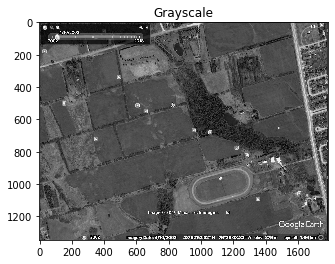

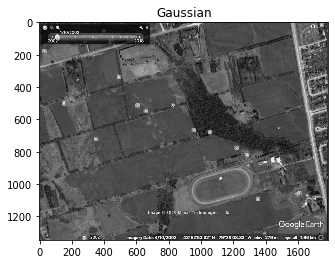

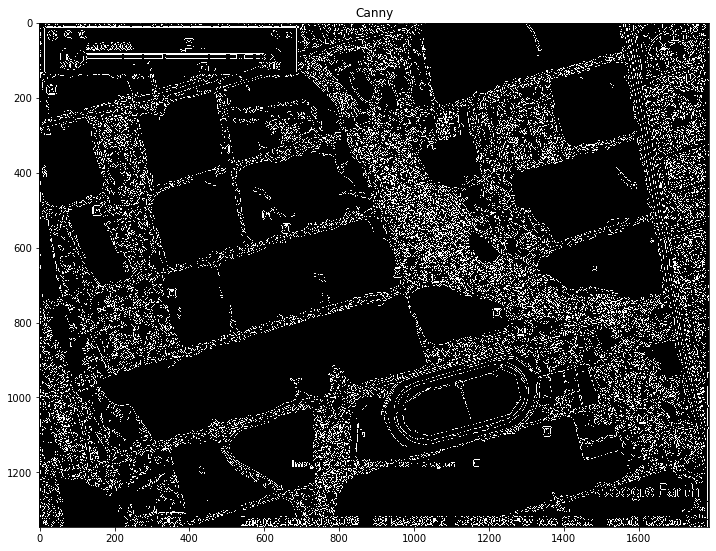

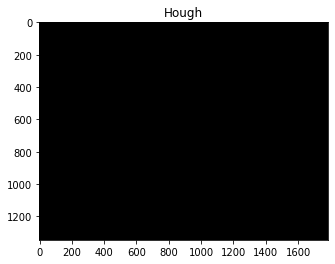

In [170]:


raw_img = mpimg.imread('images/jpegs/'+imageNames[0])


gray_img = grayscale(raw_img)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale")
plt.show()


# Now let's apply a Gaussian Blur to this image.
# I am using Kernel 5 because this image seems to be similar
# to the one from the previous quiz, where we settled on 5.
gaussian_img = gaussian_blur(gray_img, 5)
plt.imshow(gaussian_img, cmap='gray')
plt.title("Gaussian")
plt.show()

# Now let's apply Canny algorithm to detect the edges
canny_img = canny(gaussian_img, 20, 90)
plt.figure(figsize=(12,12))
plt.imshow(canny_img, cmap='gray')
plt.title("Canny")
plt.show()

# Now let's run the Hough lines
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 5     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 7 #minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments

hough_img = hough_lines(canny_img, rho, theta, threshold, min_line_length, max_line_gap)
plt.imshow(hough_img, cmap='gray')
plt.title("Hough")
plt.show()